### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the csv file
df = pd.read_csv('footfalls.csv')

In [3]:
# dataframe
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
#Statical description of dataframe
df.describe()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1822.226415,80.000000,7.502746,8506.666667,0.088050,0.088050,0.088050,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761
std,181.601732,46.043458,0.101775,7605.556039,0.284263,0.284263,0.284263,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866
min,1361.000000,1.000000,7.215975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1698.500000,40.500000,7.437500,1640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1831.000000,80.000000,7.512618,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1967.000000,119.500000,7.584265,14280.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2223.000000,159.000000,7.706613,25281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# checking NA values
df.isna().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [13]:
data = df.copy()

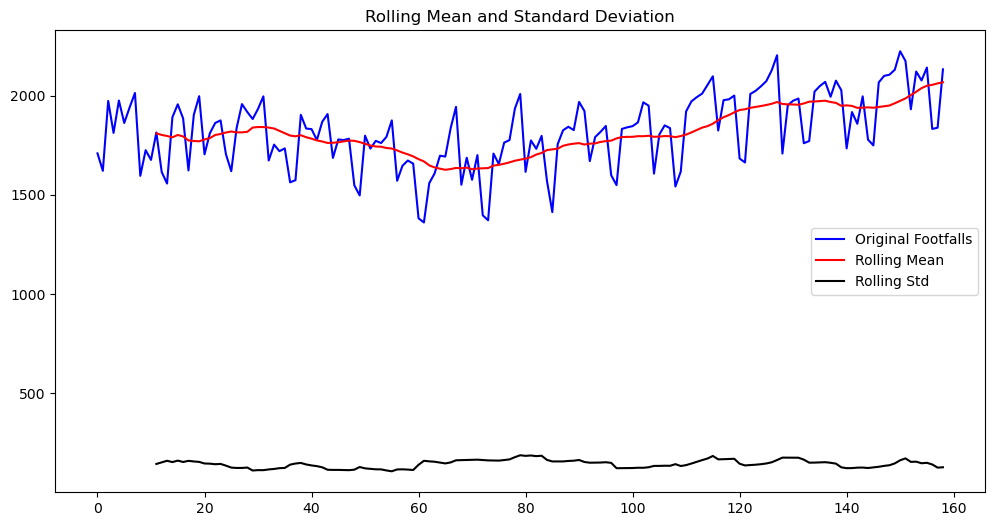

{'Test Statistic': -0.23499112877867379,
 'p-value': 0.9342202042969279,
 'Lags Used': 14,
 'Number of Observations': 144,
 'Critical Values': {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085}}

In [19]:
from statsmodels.tsa.stattools import adfuller

# Extract the relevant Footfalls column as a time series
ts = data['Footfalls']

# Function to perform Dickey-Fuller test
def dickey_fuller_test(series):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 
              'p-value': result[1], 
              'Lags Used': result[2], 
              'Number of Observations': result[3], 
              'Critical Values': result[4]}
    return output

# Calculate rolling mean and standard deviation
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

# Plot the rolling statistics and the original series
plt.figure(figsize=(12,6))
plt.plot(ts, color='blue', label='Original Footfalls')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

# Perform Dickey-Fuller test
df_test_result = dickey_fuller_test(ts)
df_test_result


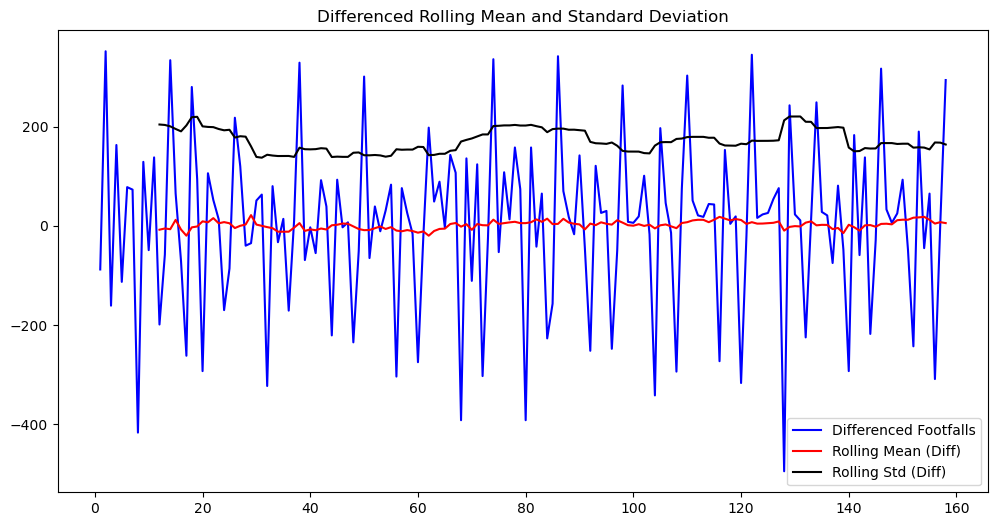

{'Test Statistic': -3.326842715430052,
 'p-value': 0.013720419909834882,
 'Lags Used': 13,
 'Number of Observations': 144,
 'Critical Values': {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085}}

In [17]:
# Perform first-order differencing to remove trend
ts_diff = ts.diff().dropna()

# Recalculate rolling mean and standard deviation
rolling_mean_diff = ts_diff.rolling(window=12).mean()
rolling_std_diff = ts_diff.rolling(window=12).std()

# Plot the differenced time series with rolling statistics
plt.figure(figsize=(12,6))
plt.plot(ts_diff, color='blue', label='Differenced Footfalls')
plt.plot(rolling_mean_diff, color='red', label='Rolling Mean (Diff)')
plt.plot(rolling_std_diff, color='black', label='Rolling Std (Diff)')
plt.legend()
plt.title('Differenced Rolling Mean and Standard Deviation')
plt.show()

# Perform Dickey-Fuller test on differenced series
df_test_diff_result = dickey_fuller_test(ts_diff)
df_test_diff_result


In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [28]:
# Extract the Footfalls column
ts = data['Footfalls']  

## Split Data into Training and Testing Sets

In [54]:
train_size = int(len(ts) * 0.7)
#train data - 70%
train = ts[:train_size]
#test data - 30%
test = ts[train_size:]

In [56]:
# ARIMA(p, d, q)
model = ARIMA(train, order=(1, 1, 1))  
# Train the model
model_fit = model.fit()  


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


## Forecast Future Values

In [59]:
# Total steps to forecast
forecast_steps = len(test) + 10  
# Perform forecasting
forecast = model_fit.forecast(steps=forecast_steps)  

## Evaluate the Model

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract predicted values for the test set
predicted = forecast[:len(test)]
test_actual = test.values

# Calculate metrics
rmse = sqrt(mean_squared_error(test_actual, predicted))
mae = mean_absolute_error(test_actual, predicted)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 256.8027952025294
Mean Absolute Error (MAE): 225.81900165434453


## Visualize Actual vs Predicted vs Future Forecast

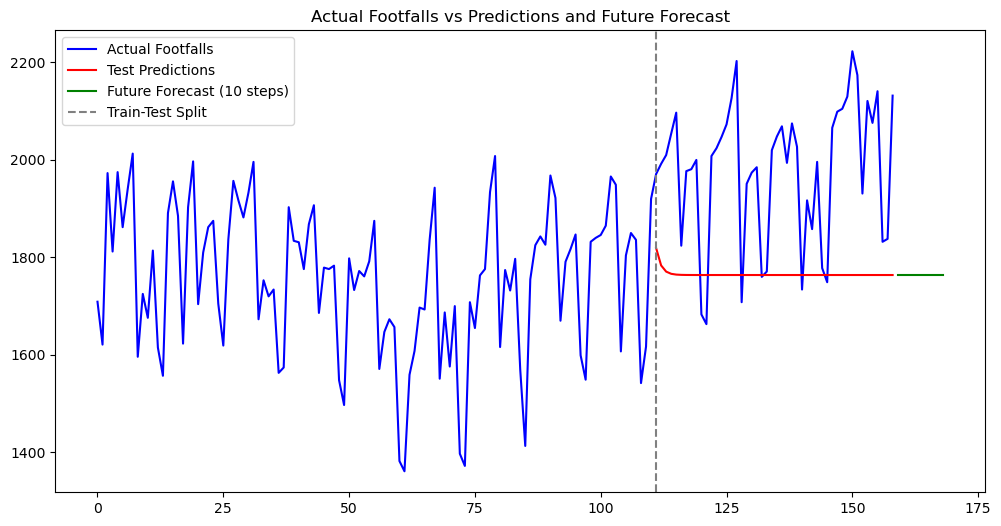

In [40]:
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(ts, label='Actual Footfalls', color='blue')

# Plot predicted values for the test period
plt.plot(range(train_size, train_size + len(test)), predicted, label='Test Predictions', color='red')

# Plot future forecast (next 10 values)
plt.plot(range(train_size + len(test), train_size + len(test) + 10), forecast[-10:], label='Future Forecast (10 steps)', color='green')

# Add train-test split marker
plt.axvline(x=train_size, color='gray', linestyle='--', label='Train-Test Split')

plt.title('Actual Footfalls vs Predictions and Future Forecast')
plt.legend()
plt.show()


## Extract the Next 10 Forecasted Values

In [42]:
print("Next 10 Forecasted Footfalls:")
print(forecast[-10:])


Next 10 Forecasted Footfalls:
159    1763.799633
160    1763.799633
161    1763.799633
162    1763.799633
163    1763.799633
164    1763.799633
165    1763.799633
166    1763.799633
167    1763.799633
168    1763.799633
Name: predicted_mean, dtype: float64
